# Extracting data from Copernicus dataset

The second step is to extract the Copernicus data from the `.nc` file, downloaded from https://cds.climate.copernicus.eu/

## 2. Extract data from dataset

1. This is achieved using **netCDF4** package:

In [1]:
from netCDF4 import Dataset
nc = Dataset('data/Hs_Irish_sea_Data.nc', 'r')
print(nc.variables)
pass

{'number': <class 'netCDF4.Variable'>
int64 number()
    long_name: ensemble member numerical id
    units: 1
    standard_name: realization
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -9223372036854775806 used, 'valid_time': <class 'netCDF4.Variable'>
int64 valid_time(valid_time)
    long_name: time
    standard_name: time
    units: seconds since 1970-01-01
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (5844,)
filling on, default _FillValue of -9223372036854775806 used, 'latitude': <class 'netCDF4.Variable'>
float64 latitude(latitude)
    _FillValue: nan
    units: degrees_north
    standard_name: latitude
    long_name: latitude
    stored_direction: decreasing
unlimited dimensions: 
current shape = (2,)
filling on, 'longitude': <class 'netCDF4.Variable'>
float64 longitude(longitude)
    _FillValue: nan
    units: degrees_east
    standard_name: longitude
    long_name: longitude
unlimited dimensions: 
current shape = (2,)
f

2. After this, extract variables and check if they are correct. Each parameter has their own abbreviation, as can be seen below:

<img width="80%" src="./img/var_2.png" /><br>
<img width="80%" src="./img/var_1.png" /><br>
<img width="80%" src="./img/var_3.png" /><br>
<img width="80%" src="./img/var_4.png" /><br>

In [7]:
lon = nc.variables['longitude']
lat = nc.variables['latitude']
time = nc.variables['valid_time']

hs = nc.variables['shww']
tp = nc.variables['pp1d']

lon_array = lon[:]
lat_array = lat[:]
time_array = time[:]

hs_array = hs[:]
period_array = tp[:]

print(f'The project area spans between {lon_array[0]} and {lon_array[1]} degrees longitude.')
print(f'The project area spans between {lat_array[0]} and {lat_array[1]} degrees latitude.')

The project area spans between -5.5 and -5.0 degrees longitude.
The project area spans between 55.0 and 54.5 degrees latitude.


3. To work efficiently with the data, filter the array on a specific grid point. This point can lie between [0,1]

In [10]:
i = 1 #for the present case, the values can be 0,1
j = 1 #for the present case, the values can be 0,1
hs_array = hs[:,i,j]
period_array = tp[:,i,j]

print("Hs array")
print(hs_array)

print("Tp array")
print(period_array)

Hs array
[1.6630859 1.5395508 1.5930176 ... 1.9033203 1.1247559 1.0646973]
Tp array
[5.8494644 6.906349  6.1341324 ... 7.6763687 7.699562  6.331398 ]


3. Lastly, export the data to an excel sheet

In [11]:
import numpy as np
import pandas as pd

data = np.array([time_array,
         hs_array,
         period_array])
data = data.T


df = pd.DataFrame(data, columns=['time', 'Hs', 'Tp'])

df.to_csv('hsarrays.csv', index=False)

4. Visualising the datapoint

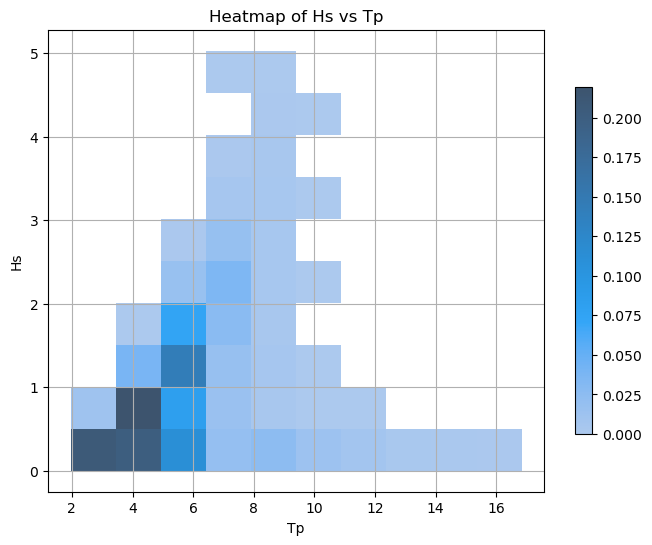

In [16]:
import matplotlib.pylab as plt
import seaborn as sns

dataIn = pd.read_csv('hsarrays.csv')

plt.figure(figsize=(8,6))
sns.histplot(data=dataIn, x = 'Tp', y = 'Hs', bins=10, cbar=True, cbar_kws=dict(shrink=.75), stat='density');
plt.title('Heatmap of Hs vs Tp')
plt.grid()